In [10]:
import numpy as np
from skimage import io
import util as ut
import math
import matplotlib.pyplot as plt

# Teil 1

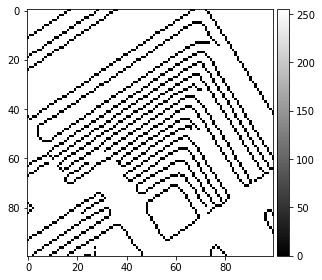

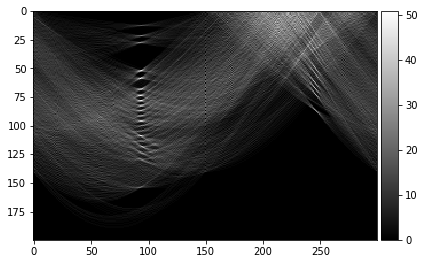

[(7, 214), (10, 211), (10, 233), (19, 214), (32, 244), (52, 94), (59, 93), (61, 244), (67, 245), (68, 95), (74, 92), (74, 93), (74, 94), (78, 93), (78, 94), (87, 93), (87, 94), (96, 93), (96, 94), (109, 93), (109, 94)]


AttributeError: module 'matplotlib.pyplot' has no attribute 'invert_xaxis'

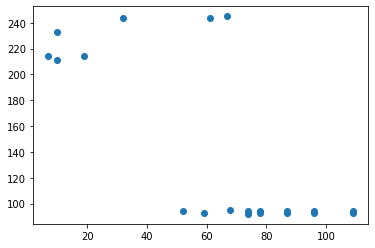

In [17]:
def get_r_idx(r, max, step):
    result = r / max * step
    return result if round(result) < step else result - 1

def linearHT(im_edge, angle_steps=100, radius_steps=100):
    output = np.zeros((radius_steps, angle_steps))
    r_max = math.hypot(len(im_edge[0]), len(im_edge))
    for line_idx, line in enumerate(im_edge):
        for pxl_idx, pxl in enumerate(line):
            if pxl != 255:
                for theta_idx in range(0, angle_steps):
                    theta = 1.0 * theta_idx * math.pi / angle_steps
                    r = abs(pxl_idx * math.cos(theta) + line_idx * math.sin(theta))
                    r_idx = get_r_idx(r, r_max, radius_steps)
                    output[round(r_idx)][theta_idx] += 1
    return output

def linearHT_th(img, threshold):
    img_copy = img.copy()
    out = []
    img_copy = img_copy.flatten()
    img_copy.sort()
    min = img_copy[-1] * (100-threshold)/100
    for indR, pxl in enumerate(img):
        for indTheta, theta in enumerate(pxl):
            if theta > min:
                out.append((indR, indTheta))
    return out

def printEdge(edges, width, img):
    #test = edges[0]
    #x = [float(tmp) for tmp in range(0, width)]
    #y = -(x * math.cos(test[1]) - test[0]) / math.sin(test[1])
    #plt.plot(x, y, 'r')
    #plt.show()
    plt.scatter(*zip(*edges))
    plt.show()


# read img
img_1 = io.imread("A5/line.png")

# convert to grayscale
img_1 = ut.rgb2gray(img_1)

# plot img
ut.printImage(img_1)

# plot imgOut
imgOut_1 = linearHT(img_1, 300, 200)
ut.printImage(imgOut_1)

imgOut_2 = linearHT_th(imgOut_1, 25)
print(imgOut_2)
printEdge(imgOut_2, img_1.shape[0], img_1)


## Welche Schwellwerte sind sinnvoll?

Je dicker die Kante desto höher sollte der Wert sein, aber bestenfalls unter 30%.

# Teil 2 Fragen

### a) Wie können die Kanten im ursprünglichen Bild mit dieser Schwelloperation ermittelt werden?
Man sucht nach allen Werten innerhalb des Thresholds. Daraus ergibt sich der R und Theta Wert, aus dem man die Kante rekonsturieren könnte.

### b) Welches sind die dominierendsten (längsten) Kanten?
Die dominierendsten Kanten erkennt man daran, dass sie besonders helle Punkte im Tranfsormationsraum erzeugen.

### c) Anstelle der Schwelloperation könnte auch die Methode der Non-Maximum Suppression verwendet werden, um die Punkte im HoughArray ("Huff-Array") detektieren zu können. Beschreiben Sie diese Methode kurz.

Anstatt alle Maxima rauszusuchen, werden bei dieser Methode alle Nicht-Maxima auf null gesetzt.